In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indicium-teste-seleo-analista/colaborador_agencia.csv
/kaggle/input/indicium-teste-seleo-analista/colaboradores.csv
/kaggle/input/indicium-teste-seleo-analista/propostas_credito.csv
/kaggle/input/indicium-teste-seleo-analista/agencias.csv
/kaggle/input/indicium-teste-seleo-analista/contas.csv
/kaggle/input/indicium-teste-seleo-analista/clientes.csv
/kaggle/input/indicium-teste-seleo-analista/transacoes.csv


# Importando arquivos

In [2]:
df_agencias = pd.read_csv("/kaggle/input/indicium-teste-seleo-analista/agencias.csv",index_col='cod_agencia')
print(f"Quantidade de Agências: {df_agencias.shape[0]}")
df_agencias

Quantidade de Agências: 10


,nome,endereco,cidade,uf,data_abertura,tipo_agencia
cod_agencia,,,,,,
7,Agência Digital,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2015-08-01,Digital
1,Agência Matriz,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2010-01-01,Física
2,Agência Tatuapé,"Praça Sílvio Romero, 158 - Tatuapé, São Paulo ...",São Paulo,SP,2010-06-14,Física
3,Agência Campinas,"Av. Francisco Glicério, 895 - Vila Lidia, Camp...",Campinas,SP,2012-03-04,Física
4,Agência Osasco,"Av. Antônio Carlos Costa, 1000 - Bela Vista, O...",Osasco,SP,2013-11-06,Física
5,Agência Porto Alegre,"Av. Bento Gonçalves, 1924 - Partenon, Porto Al...",Porto Alegre,RS,2013-12-01,Física
6,Agência Rio de Janeiro,"R. Sen. Dantas, 15 - Centro, Rio de Janeiro - ...",Rio de Janeiro,RJ,2015-04-01,Física
8,Agência Jardins,"Av. Brg. Faria Lima, 2491 - Jardim Paulistano,...",São Paulo,SP,2018-01-09,Física
9,Agência Florianópolis,"Av. Jorn. Rubéns de Arruda Ramos, 1280 - Centr...",Florianópolis,SC,2019-10-09,Física


In [3]:
df_clientes = pd.read_csv("/kaggle/input/indicium-teste-seleo-analista/clientes.csv",
                          index_col='cod_cliente')
print(f"Quantidade de Clientes: {df_clientes.shape[0]}")
df_clientes.sample(n=10)

Quantidade de Clientes: 998


,primeiro_nome,ultimo_nome,email,tipo_cliente,data_inclusao,cpfcnpj,data_nascimento,endereco,cep
cod_cliente,,,,,,,,,
652,Fernanda,da Cruz,vda-rocha@example.net,PF,2020-10-23 15:23:00 UTC,036.419.278-03,1991-07-24,"Largo Cecília Castro, 14 Alto Caiçaras 47705-0...",69878-651
896,Marina,Viana,aragaoagatha@example.org,PF,2018-06-19 14:13:00 UTC,246.385.901-60,1999-08-06,Chácara Cunha Madre Gertrudes 93492613 Porto / CE,31235095
412,Enzo,Moraes,marcelasales@example.net,PF,2020-12-01 14:13:00 UTC,193.520.874-88,1973-06-10,Área de da Rosa Santa Cruz 83177213 Gonçalves ...,19613-119
469,Maria Sophia,Gonçalves,heitorsouza@example.net,PF,2018-09-27 11:50:00 UTC,138.096.254-42,1974-05-18,"Praça Levi Peixoto, 291 São Pedro 94053525 Jes...",79618894
423,Heloísa,Carvalho,enzogoncalves@example.net,PF,2017-11-26 16:12:00 UTC,512.748.639-37,1992-10-10,"Distrito Jesus, 3 Santa Maria 49567-381 da Ros...",99953812
295,Kamilly,Mendes,gabrielly68@example.com,PF,2017-07-13 13:27:00 UTC,789.613.420-96,1970-01-10,"Vereda de Aragão, 33 Goiania 85239-665 Silva / PA",35498603
611,Ana Julia,Ramos,pedro-miguelmartins@example.net,PF,2019-08-06 14:42:00 UTC,164.598.302-15,1967-04-02,"Área de Pereira, 4 Caiçaras 68043-152 Barbosa ...",62394839
649,Clarice,Cunha,brenda34@example.net,PF,2016-04-11 13:35:00 UTC,631.528.049-89,1958-10-02,"Viela Thales Santos, 133 Vila Santa Monica 2ª ...",37183-556
954,Augusto,Silveira,ana-clara17@example.net,PF,2012-04-15 10:23:00 UTC,459.762.083-47,1983-01-25,"Recanto Souza, 43 São Luiz 36309550 Aragão / ES",86541-029


Verifica-se a coluna "cep" com formatos variados, a serem tratados futuramente.

In [4]:
df_colaborador = pd.read_csv('/kaggle/input/indicium-teste-seleo-analista/colaboradores.csv')
df_colaborador

,cod_colaborador,primeiro_nome,ultimo_nome,email,cpf,data_nascimento,endereco,cep
0,14,Paulo,Dias,melissalopes@example.net,847.210.695-02,1974-04-24,"Lagoa de Rodrigues, 62 Zilah Sposito 37328-273...",27275674
1,19,Luiz Fernando,Dias,pcunha@example.net,820.415.963-33,1994-07-10,"Ladeira de Moreira, 82 Jardim Atlântico 27617-...",50013962
2,32,Vitor Hugo,Dias,aragaonicolas@example.net,936.172.548-37,1986-12-18,Área Sophie Moreira Maria Virgínia 71941-111 S...,08955-215
3,88,João Gabriel,Lima,luiz-otaviorezende@example.org,967.082.451-67,1994-10-19,"Trevo Murilo Ramos, 92 São Benedito 73615-597 ...",24224-305
4,39,Maria Eduarda,Melo,joao-pedro72@example.com,857.496.210-49,1996-03-01,"Parque de Moura, 65 Granja Werneck 67769059 da...",96896390
...,...,...,...,...,...,...,...,...
95,94,Melissa,Gonçalves,caldeirasamuel@example.com,825.670.139-03,1971-01-09,"Largo de Pinto, 96 Vila Independencia 2ª Seção...",66939-843
96,28,Alexandre,Nascimento,olivia97@example.org,719.360.824-03,1992-01-12,"Aeroporto Maria Cecília Rocha, 39 Serra Do Cur...",42178150
97,80,Clarice,Nascimento,lorena74@example.org,956.104.283-51,1995-12-01,"Rua de da Mota, 7 Vila Mantiqueira 17429735 Je...",40016475
98,27,Marcela,da Conceição,mcosta@example.com,139.467.025-70,1963-05-14,"Avenida de Campos, 513 Tres Marias 67624232 Co...",66423556


In [5]:
df_colaborador_agencia = pd.read_csv('/kaggle/input/indicium-teste-seleo-analista/colaborador_agencia.csv')
print(df_colaborador_agencia.shape)
df_colaborador_agencia.head()


(100, 2)


,cod_colaborador,cod_agencia
0,7,1
1,13,1
2,14,1
3,23,1
4,24,1


Nota-se que esta planilha possui uma linha para cada código de colaborador e este está vinculado a uma agência.

Portanto, o código de colaborador é o índice deste dataframe.

In [6]:
df_colaborador_agencia = df_colaborador_agencia.set_index('cod_colaborador').sort_index()
df_colaborador_agencia

,cod_agencia
cod_colaborador,
1,9
2,6
3,4
4,3
5,5
...,...
96,2
97,6
98,3


## Contas bancárias


In [7]:
df_contas = pd.read_csv('/kaggle/input/indicium-teste-seleo-analista/contas.csv')
df_contas.sample(10)

,num_conta,cod_cliente,cod_agencia,cod_colaborador,tipo_conta,data_abertura,saldo_total,saldo_disponivel,data_ultimo_lancamento
858,696,696,7,85,PF,2021-12-24 13:02:00 UTC,331.3233,133.89,2022-12-29 23:59:59.365934 UTC
50,410,410,1,34,PF,2019-04-22 13:24:00 UTC,2612.7907,2608.29,2022-12-30 00:00:00.675814 UTC
957,359,359,8,80,PF,2019-01-15 11:27:00 UTC,60095.9062,57983.04,2022-05-10 20:02:31 UTC
248,104,104,3,45,PF,2018-01-04 12:09:00 UTC,10225.3776,10009.55,2022-12-30 00:00:00.624769 UTC
171,175,175,2,57,PF,2015-12-17 14:44:00 UTC,1931.3690,1744.86,2018-05-18 21:30:15 UTC
494,265,265,7,20,PF,2019-06-05 11:17:00 UTC,36319.3320,34565.51,2022-12-29 23:50:17 UTC
297,39,39,4,3,PF,2022-04-25 15:35:00 UTC,12353.2128,12760.23,2022-12-29 23:59:59.468678 UTC
259,374,374,3,47,PF,2013-07-28 11:52:00 UTC,71434.5528,69922.48,2021-03-04 21:21:16 UTC
131,517,517,2,15,PF,2020-12-11 15:57:00 UTC,62271.8175,64049.89,2022-12-29 23:59:59.977786 UTC
606,782,782,7,26,PF,2019-01-10 11:19:00 UTC,35279.7357,32124.63,2022-02-19 07:16:19 UTC


## Propostas de crédito

In [8]:
df_credito = pd.read_csv('/kaggle/input/indicium-teste-seleo-analista/propostas_credito.csv')
df_credito = df_credito.set_index(df_credito['cod_proposta'])
df_credito

,cod_proposta,cod_cliente,cod_colaborador,data_entrada_proposta,taxa_juros_mensal,valor_proposta,valor_financiamento,valor_entrada,valor_prestacao,quantidade_parcelas,carencia,status_proposta
cod_proposta,,,,,,,,,,,,
116,116,338,1,2014-05-30 18:43:12 UTC,0.0194,36199.950355,50032.03,13832.079645,1045.219825,58,0,Enviada
715,715,45,1,2021-06-17 13:09:32 UTC,0.0131,12897.538285,19848.55,6951.011715,232.124685,100,1,Enviada
755,755,494,1,2021-08-10 04:24:02 UTC,0.0203,122236.312551,187154.36,64918.047449,3673.518951,56,0,Enviada
953,953,381,1,2011-02-23 07:57:58 UTC,0.0167,47784.649757,59530.61,11745.960243,955.041560,109,3,Enviada
1046,1046,176,1,2010-11-15 16:03:28 UTC,0.0211,178393.038243,214294.19,35901.151757,10219.659415,22,4,Enviada
...,...,...,...,...,...,...,...,...,...,...,...,...
1758,1758,176,99,2010-01-10 08:12:47 UTC,0.0133,96404.111608,184043.36,87639.248392,1673.386037,110,6,Validação documentos
582,582,241,100,2019-02-25 05:03:22 UTC,0.0151,61292.834593,82684.29,21391.455407,2219.574245,36,2,Validação documentos
970,970,106,100,2011-06-05 04:13:16 UTC,0.0225,100371.681790,152272.50,51900.818210,3482.000980,47,2,Validação documentos


# Transações bancárias

In [9]:
df_transacoes = pd.read_csv('/kaggle/input/indicium-teste-seleo-analista/transacoes.csv')
df_transacoes

,cod_transacao,num_conta,data_transacao,nome_transacao,valor_transacao
0,3100,256,2020-05-22 03:15:21 UTC,Saque,-130.0
1,28405,256,2021-06-29 11:52:38 UTC,Saque,-255.0
2,1776,512,2020-05-17 13:04:50 UTC,Saque,-250.0
3,14311,512,2020-09-06 02:55:34 UTC,Saque,-80.0
4,25012,512,2020-10-16 09:26:52 UTC,Saque,-475.0
...,...,...,...,...,...
71994,17007,764,2022-12-29 23:59:59.746608 UTC,Transferência entre CC - Crédito,82.3
71995,22320,764,2022-12-29 23:59:59.055028 UTC,Transferência entre CC - Crédito,414.8
71996,8697,509,2012-05-07 13:45:41 UTC,Transferência entre CC - Crédito,720.4
71997,11574,766,2015-09-19 05:13:07 UTC,Transferência entre CC - Crédito,1143.0


# Tratamento dos dados

## Agências

In [10]:
# Separando o endereço em logradouro, número de logradouro e bairro. 
# Cidade e UF já possuem colunas próprias 
df_agencias['logradouro'] = df_agencias.endereco.apply(lambda x: x.split(',')[0])
df_agencias['no_logradouro'] = df_agencias.endereco.apply(lambda x: x.split(',')[1].split('-')[0])
df_agencias['bairro'] = df_agencias.endereco.apply(lambda x: x.split(',')[1].split('-')[1])
df_agencias = df_agencias.drop('endereco', axis=1)
df_agencias

,nome,cidade,uf,data_abertura,tipo_agencia,logradouro,no_logradouro,bairro
cod_agencia,,,,,,,,
7,Agência Digital,São Paulo,SP,2015-08-01,Digital,Av. Paulista,1436,Cerqueira César
1,Agência Matriz,São Paulo,SP,2010-01-01,Física,Av. Paulista,1436,Cerqueira César
2,Agência Tatuapé,São Paulo,SP,2010-06-14,Física,Praça Sílvio Romero,158,Tatuapé
3,Agência Campinas,Campinas,SP,2012-03-04,Física,Av. Francisco Glicério,895,Vila Lidia
4,Agência Osasco,Osasco,SP,2013-11-06,Física,Av. Antônio Carlos Costa,1000,Bela Vista
5,Agência Porto Alegre,Porto Alegre,RS,2013-12-01,Física,Av. Bento Gonçalves,1924,Partenon
6,Agência Rio de Janeiro,Rio de Janeiro,RJ,2015-04-01,Física,R. Sen. Dantas,15,Centro
8,Agência Jardins,São Paulo,SP,2018-01-09,Física,Av. Brg. Faria Lima,2491,Jardim Paulistano
9,Agência Florianópolis,Florianópolis,SC,2019-10-09,Física,Av. Jorn. Rubéns de Arruda Ramos,1280,Centro


In [11]:
df_agencias['data_abertura_parsed'] = pd.to_datetime(df_agencias.data_abertura,format='%Y-%m-%d')
df_agencias.data_abertura_parsed.describe().T

count                     10
mean     2015-01-29 07:12:00
min      2010-01-01 00:00:00
25%      2012-08-04 00:00:00
50%      2014-08-01 00:00:00
75%      2017-05-31 00:00:00
max      2021-10-09 00:00:00
Name: data_abertura_parsed, dtype: object

## Clientes

In [12]:
#Convertendo as datas no formato correto
df_clientes['data_nascimento_parsed'] = pd.to_datetime(df_clientes.data_nascimento, format='%Y-%m-%d')
df_clientes['data_inclusao_parsed'] = pd.to_datetime(df_clientes.data_inclusao)

df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 28 to 853
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   primeiro_nome           998 non-null    object             
 1   ultimo_nome             998 non-null    object             
 2   email                   998 non-null    object             
 3   tipo_cliente            998 non-null    object             
 4   data_inclusao           998 non-null    object             
 5   cpfcnpj                 998 non-null    object             
 6   data_nascimento         998 non-null    object             
 7   endereco                998 non-null    object             
 8   cep                     998 non-null    object             
 9   data_nascimento_parsed  998 non-null    datetime64[ns]     
 10  data_inclusao_parsed    998 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), obj

In [13]:
# Retirando os hifens do CEP dos clientes
df_clientes['cep'] = df_clientes.cep.apply(lambda x: x.replace('-',''))
df_clientes.cep.sample(20)

cod_cliente
201    92524874
384    20679948
71     67750393
310    05675228
48     58403824
104    92815998
35     06463522
794    26042844
609    92215516
276    15309406
793    41051300
330    59204955
254    98430781
878    10183184
513    75408722
677    46015684
657    54404420
89     53954224
86     92293551
635    66905558
Name: cep, dtype: object

## Contas

In [14]:
df_contas.data_ultimo_lancamento.sample()

983    2022-12-30 00:00:00.58848 UTC
Name: data_ultimo_lancamento, dtype: object

In [15]:
# transformando a data de último lançamento em formato data
df_contas['data_ultimo_lancamento_parsed'] = pd.to_datetime(df_contas.data_ultimo_lancamento,
                                                            format='mixed')
df_contas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   num_conta                      999 non-null    int64              
 1   cod_cliente                    999 non-null    int64              
 2   cod_agencia                    999 non-null    int64              
 3   cod_colaborador                999 non-null    int64              
 4   tipo_conta                     999 non-null    object             
 5   data_abertura                  999 non-null    object             
 6   saldo_total                    999 non-null    float64            
 7   saldo_disponivel               999 non-null    float64            
 8   data_ultimo_lancamento         999 non-null    object             
 9   data_ultimo_lancamento_parsed  999 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1),

## Propostas de crédito

In [16]:
# transformando a data de último lançamento em formato data
df_credito['data_entrada_proposta_parsed'] = pd.to_datetime(df_credito.data_entrada_proposta,
                                                            format='mixed')
df_credito.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 116 to 1562
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   cod_proposta                  2000 non-null   int64              
 1   cod_cliente                   2000 non-null   int64              
 2   cod_colaborador               2000 non-null   int64              
 3   data_entrada_proposta         2000 non-null   object             
 4   taxa_juros_mensal             2000 non-null   float64            
 5   valor_proposta                2000 non-null   float64            
 6   valor_financiamento           2000 non-null   float64            
 7   valor_entrada                 2000 non-null   float64            
 8   valor_prestacao               2000 non-null   float64            
 9   quantidade_parcelas           2000 non-null   int64              
 10  carencia                      2000 non-

## Transações bancárias

In [17]:
df_transacoes['data_transacao_parsed'] = pd.to_datetime(df_transacoes['data_transacao'],format='mixed')
df_transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71999 entries, 0 to 71998
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   cod_transacao          71999 non-null  int64              
 1   num_conta              71999 non-null  int64              
 2   data_transacao         71999 non-null  object             
 3   nome_transacao         71999 non-null  object             
 4   valor_transacao        71999 non-null  float64            
 5   data_transacao_parsed  71999 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(2)
memory usage: 3.3+ MB


# Exploração dos dados

## Agências

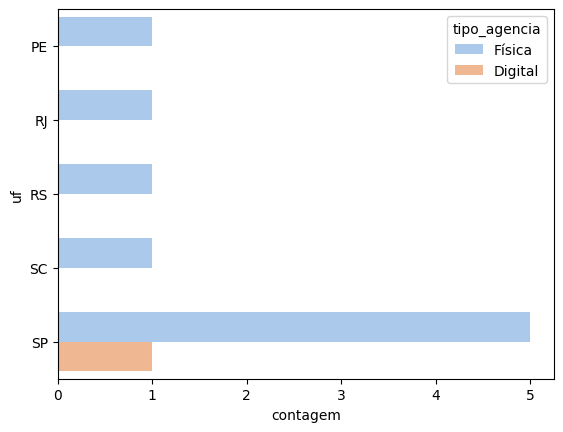

In [18]:
#contagem de agências
df_cont_agencia = df_agencias.groupby(['uf','tipo_agencia']).size().reset_index(name='contagem')


sns.barplot(data=df_cont_agencia,
              y = 'uf',
            x = 'contagem',
             hue = 'tipo_agencia',
             #dodge="auto",
             palette='pastel')

plt.show()

## Clientes por agência

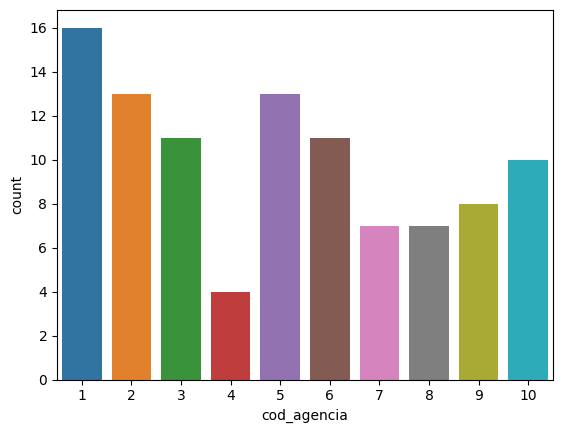

In [19]:
sns.countplot(data=df_colaborador_agencia,
             x=df_colaborador_agencia.cod_agencia)
plt.show()

## Transações

In [20]:
#df_transacoes = df_transacoes.

# Entregas

Nem todos os envolvidos estão convictos com a ideia de uma frente de BIs no BanVic. Como podemos convencer Camila Diniz, diretora comercial, que as nossas soluções serão úteis para a empresa? Com base na análise exploratória realizada nos dados apresentados, quais perguntas de negócio podemos responder para mostrar o valor que dados possuem para a empresa? Pergunta de nível teórico. O seu projeto final não necessariamente precisa trazer os mesmos ou todos os indicadores citados nessa entrega.


Quais serão os indicadores ou visualizações utilizadas para responder às perguntas de negócio citadas anteriormente? Pergunta de nível teórico. O seu projeto final não necessariamente precisa trazer os mesmos ou todos os indicadores citados nessa entrega.


Apresentar pelo menos duas análises de negócio para cada uma das categorias. Pergunta de nível teórico. O seu projeto final não necessariamente precisa ter todas análises citadas nessa entrega: 


- Uma análise descritiva;
- Uma análise diagnóstica;
- Uma análise prescritiva;
- Uma análise preditiva.


Um relatório em PDF com suas análises, justificativas e raciocínio contendo os seguintes pontos:
As respostas do item 1, 2 e 3.
Um tópico descrevendo brevemente quais os processos de transformação e tratamento de dados foram aplicados por você.
Um dashboard dos principais KPIs de negócio do BanVic permitindo um detalhamento por data, por agência e por clientes.
Apresentar as análises que foram necessárias para o entendimento do negócio e que podem ser úteis no suporte para a tomada de decisão.
E finalmente, com base nas suas análises, uma conclusão com recomendações/sugestões de negócio e encaminhamentos para a CEO do BanVic.
Apresentar e justificar as ferramentas adotadas para a elaboração das análises.
